In [1]:
# DON'T WORRY ABOUT THIS CELL, IT JUST SETS SOME STUFF UP THAT WAS CODED IN PREVIOUS NOTEBOOKS
import numpy as np
import matplotlib.pyplot as plt

def sample_linear_data(m=20): 
    ground_truth_w = 2.3 # slope
    ground_truth_b = -8 #intercept
    X = np.random.randn(m)*2
    Y = ground_truth_w*X + ground_truth_b + 0.2*np.random.randn(m)
    return X, Y #returns X (the input) and Y (labels)

def plot_data(X, Y):
    plt.figure()
    plt.scatter(X, Y, c='r')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
m = 50
X, Y = sample_linear_data(m)
plot_data(X, Y)

def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Hypothesis', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    
# DEFINE MEAN SQUARED ERROR LOSS FUNCTION
def L(y_hat, labels):
    errors = y_hat - labels # calculate errors
    squared_errors = np.square(errors) # square errors
    mean_squared_error = np.sum(squared_errors) / (m) # calculate mean 
    return mean_squared_error # return loss

<Figure size 640x480 with 1 Axes>

In [ ]:
class LinearHypothesis:
    def __init__(self): #initalize parameters 
        self.w = np.random.randn() ## randomly initialise weight
        self.b = np.random.randn() ## randomly initialise bias
        
    def __call__(self, X): # how do we calculate output from an input in our model?
        ypred = self.w * X + self.b ## make a prediction
        return ypred # return prediction
    
    def update_params(self, new_w, new_b):
        self.w = new_w ## set this instance's weights to the new weight value passed to the function
        self.b = new_b ## do the same for the bias

In [3]:

H = LinearHypothesis() # instantiate our linear model
y_hat = H(X) # make prediction
print('Input:',X, '\n')
print('W:', H.w, 'B:', H.b, '\n')
print('Prediction:', y_hat, '\n')

Input: [ 0.64476417 -2.44735493  4.01584009 -0.84713461  5.23815837 -1.28843747
  1.27288824  2.18938962  1.95609584  0.22009754 -2.86977721 -2.83269821
 -0.8248512  -2.22272354  1.11669274 -0.8641224   1.46167424  1.42652617
 -4.32962001 -0.1464862   0.40390307  0.21039793  0.36049184  1.40553243
  2.76186399 -0.96309023  2.55364605  1.10227165  0.0512783   1.30204728
  0.69292969 -0.57639162 -2.51063446 -2.47597632  2.49812814 -4.13432427
  0.65676208  2.18538847 -3.70190799 -0.70512346  1.33671746  3.6625388
 -2.29436719 -0.83974321 -1.26608186  0.25500899  0.87357112 -1.32737562
  1.54249009  3.97773746] 

W: -0.7452551903341408 B: -0.6814931792860974 

Prediction: [-1.16200702  1.14241079 -3.67431885 -0.05016172 -4.58525789  0.27872153
 -1.63011975 -2.31314716 -2.13928375 -0.84552202  1.45722318  1.42958986
 -0.06676854  0.97500308 -1.51371424 -0.03750148 -1.77081349 -1.74461921
  2.5451786  -0.57232358 -0.98250404 -0.83829333 -0.95015159 -1.72897352
 -2.73978665  0.03625481 -2.58

In [4]:
def plot_h_vs_y(X, y_hat, Y):
    plt.figure()
    plt.scatter(X, Y, c='r', label='Label')
    plt.scatter(X, y_hat, c='b', label='Hypothesis', marker='x')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


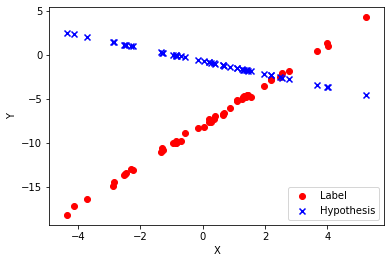

In [5]:
plot_h_vs_y(X, y_hat, Y)


In [6]:
def L(y_hat, labels):
    errors = y_hat - labels ## calculate errors
    squared_errors = errors ** 2 ## square errors
    mean_squared_error = sum(squared_errors) / len(squared_errors) ## calculate mean 
    return mean_squared_error # return loss

In [7]:
cost = L(y_hat, Y)
print(cost)

88.2148709416541


In [8]:
def random_search(n_samples, limit=20):
    best_weights = np.random.uniform(-limit, limit) # no best weight found yet
    best_bias = np.random.uniform(-limit, limit) # no best bias found yet
    lowest_cost = float('inf') # initialize it very high
    for i in range(0, n_samples): # try this many different parameterisations
        w = np.random.uniform(-limit, limit) # randomly sample a weight within the limits of the search
        b = np.random.uniform(-limit, limit) # randomly sample a bias within the limits of the search
        H.update_params(w, b) # update our model with random parameters
        y_hat = H(X) # make prediction
        cost = L(y_hat, Y) # calculate loss
        if cost < lowest_cost: # if this is the best parameterisation so far
            lowest_cost = cost # update the lowest running cost to the cost for this parameterisation
            best_weights = w # get best weights so far from the model
            best_bias = b # get best bias so far from the model
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return best_weights, best_bias

Lowest cost of 3.424105257205228 achieved with weight of 3.1492474312559224 and bias of -7.909077886946179


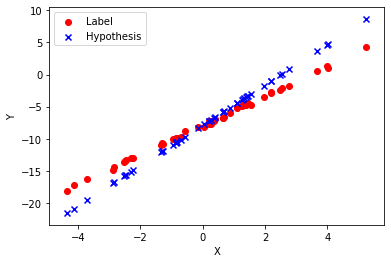

In [9]:

best_weights, best_bias = random_search(100) # do 100 samples in a random search 
H.update_params(best_weights, best_bias) # make sure to set our model's weights to the best values we found
plot_h_vs_y(X, H(X), Y)

In [10]:
from itertools import permutations
def generate_grid_search_values(n_params, n_samples=100, minval=-2.5, maxval=2.5):
    n_samples_per_param = int(np.power(n_samples, 1 / n_params)) # want 100 samples for 2 variables, so try 10 different values for each parameter because 10^2=100
    print(f'Trying {n_samples_per_param} samples per parameter')
    param_values = np.linspace(minval, maxval, n_samples_per_param) ## get list of different parameters to try
    grid_samples = permutations(param_values, n_params) ## try every possible permutation of the param values
    return grid_samples

def grid_search(grid_search_values):
    best_weights = np.random.randn() ## no best weight found yet
    best_bias = np.random.randn() ## no best bias found yet
    lowest_cost = float('inf') ## initialize it very high
    for search_val in grid_search_values: # for each model parameterisation that we will try 
        w, b = search_val
        H.update_params(w, b) ## update model parameters
        y_hat = H(X) ## make prediction
        cost = L(y_hat, Y) ## calculate loss
        if cost < lowest_cost: ## if this is the best parameterisation so far
            lowest_cost = cost ## update the lowest running cost to the cost for this parameterisation
            best_weights = w ## get best weights so far from the model
            best_bias = b ## get best bias so far from the model
    print('Lowest cost of', lowest_cost, 'achieved with weight of', best_weights, 'and bias of', best_bias)
    return best_weights, best_bias

Trying 10 samples per parameter
Lowest cost of 29.71638812121159 achieved with weight of 1.9444444444444446 and bias of -2.5


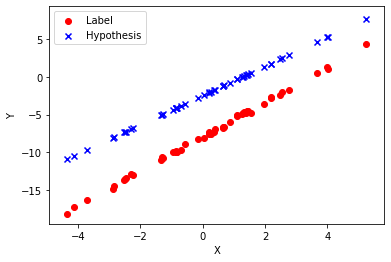

Trying 9 samples per parameter
Lowest cost of 29.840011472510856 achieved with weight of 1.875 and bias of -2.5


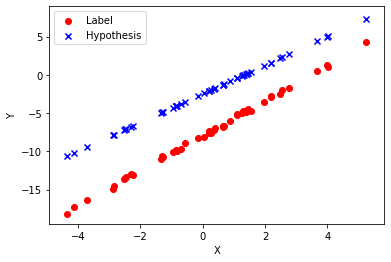

In [11]:
# try using 100 grid search values
grid_search_values = generate_grid_search_values(2, n_samples=100) # generate model parameterisations to try
best_weights, best_bias = grid_search(grid_search_values) # perform grid search
H.update_params(best_weights, best_bias) ## update model with best parameters found
plot_h_vs_y(X, H(X), Y) # plot predictions and true labels

grid_search_values = generate_grid_search_values(2, n_samples=99) # generate model parameterisations to try
best_weights, best_bias = grid_search(grid_search_values) # perform grid search
H.update_params(best_weights, best_bias) # update model with best parameters found
plot_h_vs_y(X, H(X), Y) # plot predictions and true labels

In [17]:

class LinearHypothesis:
    def __init__(self): 
        self.w = np.random.randn() # weight
        self.b = np.random.randn() # bias
    
    def __call__(self, X): # how do we calculate output from an input in our model?
        y_hat = self.w*X + self.b
        return y_hat
    
    def update_params(self, new_w, new_b):
        self.w = new_w
        self.b = new_b
        
    def calc_deriv(self, X, y_hat, labels):
        diffs =  y_hat - labels# calculate errors
        dLdw = 2 * np.sum(diffs * X)/len(X) # calculate derivative of loss with respect to weights
        dLdb = 2 * np.sum(diffs)/len(X) # calculate derivative of loss with respect to bias
        return dLdw, dLdb
    
H = LinearHypothesis() # initialise our model
y_hat = H(X) # make prediction
dLdw, dLdb = H.calc_deriv(X,y_hat,Y) # calculate gradient of current loss with respect to model parameters
print(dLdw, dLdb)

-31.91111204919594 13.713325410803474


Final cost: 3.8663769536858457
Weight values: 1.4432085551412994
Bias values: -7.947669469787587


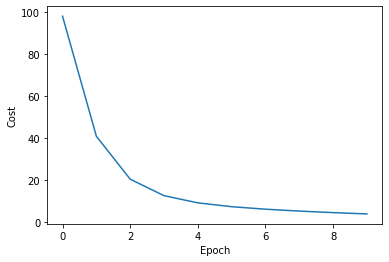

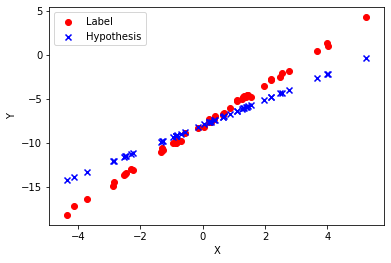

In [27]:
num_epochs = 10
learning_rate = 0.21
H = LinearHypothesis()

def train(num_epochs, X, Y, H, L, plot_cost_curve=False):
    all_costs = [] # initialise empty list of costs to plot later
    for e in range(num_epochs): # for this many complete runs through the dataset
        y_hat = H(X) # make predictions
        cost = L(y_hat, Y) # compute loss 
        dLdw, dLdb = H.calc_deriv(X, y_hat,Y) # calculate gradient of current loss with respect to model parameters
        new_w =H.w - learning_rate * dLdw  # compute new model weight using gradient descent update rule
        new_b = H.b  - learning_rate * dLdb # compute new model bias using gradient descent update rule
        H.update_params(new_w, new_b) # update model weight and bias
        all_costs.append(cost) # add cost for this batch of examples to the list of costs (for plotting)
    if plot_cost_curve: # plot stuff
        plt.figure() # make a figure
        plt.ylabel('Cost')
        plt.xlabel('Epoch')
        plt.plot(all_costs) # plot costs
    print('Final cost:', cost)
    print('Weight values:', H.w)
    print('Bias values:', H.b)
    #return cost, H.w
    
train(num_epochs, X, Y, H, L, plot_cost_curve=True) # train model and plot cost curve
plot_h_vs_y(X, H(X), Y) # plot predictions and true data